In [ ]:
pip install arviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import arviz as az
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
import statsmodels.api as sm
import pystan as stan

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
from google.colab import files
uploaded = files.upload()

Saving beisball_salarios.csv to beisball_salarios.csv


In [12]:
df = pd.read_csv("beisball_salarios.csv")

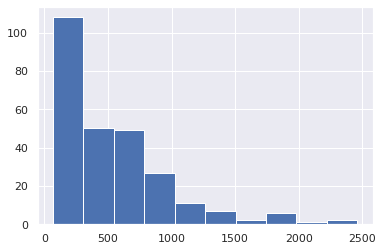

In [34]:
df['Salary'].hist()

In [30]:
sns.set()
np.random.seed(101)

model = """
data {
    int<lower=0> N;
    vector[N] x;
    vector[N] y;
    vector[N] z;
}
parameters {
    real alpha;
    real beta;
    real gamma;
    real<lower=0> sigma;
}
model {
    y ~ normal(alpha + beta * x + gamma * z, sigma);
}
"""

In [31]:
alpha = 60.0
beta = 20
gamma = 15
sigma = 1.0

x = df["AtBat"]
z = df["Hits"]
y = alpha + beta * x + gamma * z
y = np.random.normal(y, scale=sigma)

In [32]:
data = {'N': len(x), 'x': x, 'z': z, 'y': y}

sm = pystan.StanModel(model_code=model)

fit = sm.sampling(data=data, iter=1000, chains=4, warmup=500, thin=1, seed=101)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c3ce885ed72c30fc3a00aed058d5fc5e NOW.


In [33]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,60.111,0.197,59.753,60.500,0.007,0.005,826.0,885.0,1.01
beta,19.999,0.002,19.996,20.002,0.000,0.000,955.0,1087.0,1.00
gamma,15.003,0.005,14.994,15.013,0.000,0.000,1109.0,1166.0,1.01
sigma,1.033,0.045,0.946,1.114,0.002,0.001,715.0,867.0,1.00
